In [222]:
#@title Librerias
import numpy as np
import numpy.linalg as la
import matplotlib.pyplot as plt
from scipy.integrate import quad, fixed_quad, trapezoid, simpson, nquad
from sympy import symbols, diff, integrate, lambdify
import sympy as sp


# Parcial II - Métodos Computacionales (Integrales y Matrices)
**2024-2**

---

*Nombre:* Soleil Dayana Niño Murcia

*Identificación:* 1033097666

---
* Sea honest@
* El uso de herramientas de IA no está permitido
* Puede consultar la documentación de las librerias.
* Sea ordendado dando la solución a cada punto.
* *Asegurese que el notebook corra completamente*
* Suba su notebook al GitHub (en su carpeta) y recuerde hacer pull-request

# 1

**(20 puntos)**
Considera la siguiente integral:

$$
I = \int_0^1 \int_{x^2}^{x+1} \int_{y^2}^{y+2} \int_{z^2}^{z+3} (x+y+z+w) \, dw \, dz \, dy \, dx
$$

Encuentre la solución númerica usando unicamente `quad`.

```python
# Definir el integrando
integrand = lambda w, z, y, x: x + y + z + w

# Definir los límites usando funciones lambda
w_limits = lambda z, y, x: [z**2, z+3]
z_limits = lambda y, x: [y**2, y+2]
y_limits = lambda x: [x**2, x+1]
x_limits = lambda: [0, 1]

# Calcular la integral usando nquad
result, error = nquad(
    integrand,
    [w_limits, z_limits, y_limits, x_limits]
)

print(f"Resultado de la integral: {result}")
print(f"Error estimado: {error}")
```



In [223]:
# Definir el integrando
integrand = lambda w, z, y, x: x + y + z + w

# Definir los límites con funciones lambda
w_limits = lambda z, y, x: [z**2, z + 3]
z_limits = lambda y, x: [y**2, y + 2]
y_limits = lambda x: [x**2, x + 1]
x_limits = [0, 1]

# Definir las funciones de integración anidadas
def inner_integral(z, y, x):
    return quad(integrand, w_limits(z, y, x)[0], w_limits(z, y, x)[1], args=(z, y, x))[0]

def middle_integral(y, x):
    return quad(inner_integral, z_limits(y, x)[0], z_limits(y, x)[1], args=(y, x))[0]

def outer_integral(x):
    return quad(middle_integral, y_limits(x)[0], y_limits(x)[1], args=(x))[0]

integral = quad(outer_integral, x_limits[0], x_limits[1])[0]

print(f"Integral anidada en mi método: {integral}")

Integral anidada en mi método: -0.6500971589021813


Encuentre el error relativo, para esto emplee el siguiente código que usa `nquad`:


In [224]:
"""
Del código del enunciado
"""

# Definir el integrando
integrand = lambda w, z, y, x: x + y + z + w

# Definir los límites usando funciones lambda
w_limits = lambda z, y, x: [z**2, z+3]
z_limits = lambda y, x: [y**2, y+2]
y_limits = lambda x: [x**2, x+1]
x_limits = lambda: [0, 1]

# Calcular la integral usando nquad
result, error = nquad(
    integrand,
    [w_limits, z_limits, y_limits, x_limits]
)

print(f"Resultado de la integral: {result}")
print(f"Error estimado: {error}")

Resultado de la integral: -0.6500971589021813
Error estimado: 1.8391891749223705e-12


In [225]:
print('Mi integral', round(integral,5), 'vs. Quad', round(result,5))

Mi integral -0.6501 vs. Quad -0.6501


# 2

**(40 puntos)**
Un lazo de corriente de radio $a$  transporta una corriente $I$ en el punto P que está a una distancia $r$ del centro del lazo con coordenadas esféricas (r, θ, φ). Resuelve para la componente φ del potencial vectorial en el punto $P$ en términos de integrales elípticas:

\begin{equation}
A_{\phi}(r, \theta)=\frac{\mu_0}{4\pi}\frac{4Ia}{\sqrt{a^2+r^2+2ar\sin \theta}}\left(\frac{(2-k^2)K(k)-2E(k)}{k^2} \right)
\end{equation}

donde

\begin{equation}
K(k)=\int_{0}^{\pi/2} \frac{\mathrm{d\phi}}{\sqrt{1-k^2\sin^2\phi}}
\end{equation}

\begin{equation}
E(k)=\int_{0}^{\pi/2} \mathrm{d\phi} \sqrt{1-k^2\sin^2\phi}
\end{equation}

\begin{equation}
k^2=\frac{4ar\sin\theta}{a^2+r^2+2ar\sin\theta}
\end{equation}

Aquí, $K(k)$ es una integral elíptica completa del primer tipo y $E(k)$ es una integral elíptica completa del segundo tipo.


Para
* $a$ = 1,
* $I$ = 3,
* $μ0/4π$ = 1


Usando funciones explicitas explique claramente las entradas, salidas y procedimientos dentro de las mismas. Recuerde para resolver las integrales usar `quad`.



In [226]:
a, I, mu04pi = 1, 3, 1
theta, r = symbols('theta r')

theta_vals, r_vals = np.linspace(0, np.pi, 100), np.linspace(0, 10, 100)

In [242]:
# Definir las funciones para K(k) y E(k)
def K(k):
    integrando_K = lambda phi: 1 / np.sqrt(1 - k**2 * np.sin(phi)**2)
    resultado_K, _ = quad(integrando_K, 0, np.pi/2)
    return resultado_K

def E(k):
    integrando_E = lambda phi: np.sqrt(1 - k**2 * np.sin(phi)**2)
    resultado_E, _ = quad(integrando_E, 0, np.pi/2)
    return resultado_E

# Definir la función para A_phi(r, theta)
def A_phi(r, theta):
    k2 = (4 * a * r * np.sin(theta)) / (a**2 + r**2 + 2 * a * r * np.sin(theta))
    k = np.sqrt(k2)

    # Manejo de la singularidad cuando k = 0
    if k == 0:
        return 0  # Valor de A_phi cuando k = 0

    resultado_A_phi = (4 * I * a / np.sqrt(a**2 + r**2 + 2 * a * r * np.sin(theta))) * (((2 - k2) * K(k) - 2 * E(k)) / k2)
    return resultado_A_phi

grafique para:

*a)* $A_φ(r = 1.1, θ)$ vs. $0\leq θ\leq \pi$



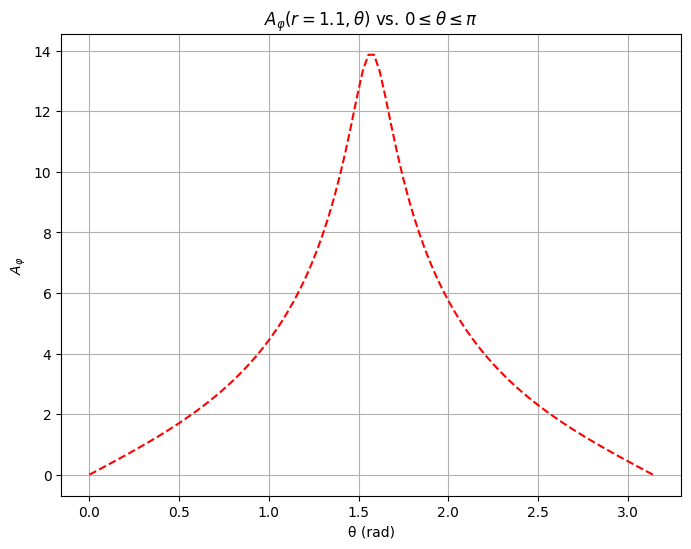

In [246]:
theta_vals = np.linspace(0, np.pi, 100)
A_phi_vals_a = [A_phi(1.1, theta) for theta in theta_vals]

plt.figure(figsize=(8, 6))
plt.plot(theta_vals, A_phi_vals_a, "r--")
plt.xlabel("θ (rad)")
plt.ylabel("$A_φ$ ")
plt.title("$A_φ(r = 1.1, θ)$ vs. $0\leq θ\leq \pi$")
plt.grid(True)
plt.show()

*b)* $A_φ(r, θ = π∕3)$ vs. $0\leq r \leq 10$

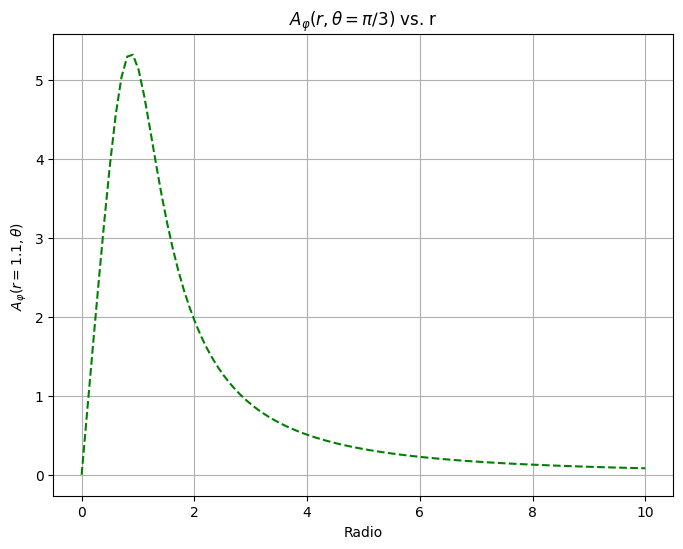

In [245]:
r_vals = np.linspace(0, 10, 100)
A_phi_vals_b = [A_phi(r, np.pi/3) for r in r_vals]

plt.figure(figsize=(8, 6))
plt.plot(r_vals, A_phi_vals_b, 'g--')
plt.xlabel("Radio")
plt.ylabel("$A_φ(r = 1.1, θ)$ ")
plt.title("$A_φ(r, θ = π∕3)$ vs. r")
plt.grid(True)
plt.show()

# 3

(**40 puntos**) El **método de la potencia inversa** es una técnica iterativa utilizada para calcular el autovalor de menor magnitud de una matriz cuadrada. Es una variante del **método de la potencia**, que normalmente encuentra el autovalor de mayor magnitud. Para ello, se aprovecha la propiedad de la matriz inversa:

$$ A^{-1} v = \frac{1}{\lambda} v $$


## Algoritmo

El método de la potencia inversa sigue los siguientes pasos:

1. Elegir un vector inicial $x^{(0)}$ no nulo.

2. Para cada iteración $k$, resolver el sistema lineal:
   
   $$ A y^{(k)} = x^{(k-1)} $$
   
   donde $y^{(k)}$ es un **vector intermedio** que se obtiene resolviendo el sistema lineal. Este vector representa la solución del sistema en cada iteración y es crucial para aproximar el autovector de menor autovalor.

3. Normalizar $y^{(k)}$ para obtener un nuevo vector de iteración:
   
   $$ x^{(k)} = \frac{y^{(k)}}{\| y^{(k)} \|} $$
   
4. Aproximar el autovalor mediante el cociente de Rayleigh:
   
   $$ \lambda^{(k)} = \frac{(x^{(k)})^T A x^{(k)}}{(x^{(k)})^T x^{(k)}} $$
   
5. Repetir los pasos anteriores hasta que la diferencia entre valores sucesivos de $\lambda$ sea menor que un umbral de tolerancia.

---

*a)* Escriba una función llamada `potencia_inversa` que dada una matriz A encuentre su valor propio menos dominante (con una tolerancia de 1e-7 usando la norma Euclidiana) y su correspondiente autovector. Para obtener $y^{(k)}$ puede emplear `np.linalg.solve` recordando que $Ay = x$.



In [254]:
def potencia_inversa(A, tol = 1e-7):
  """
  Toma:
  A = una matriz


  Retorna:
  El autovalor menos dominante y su correspondiente autovector
  """
  n = len(A)

  # Tomar vector inicial no nulo
  x0 = np.random.rand(n)
  lambda_k = 0
  new = 1000
  while (abs(lambda_k - new)) > tol:

    y_k = np.linalg.solve(A, x0) # 2. Hallar el vector intermedio

    x_k = y_k / np.linalg.norm(y_k) # 3. Normalizar  y(k)  para obtener un nuevo vector de iteración

    lambda_k_den = np.dot(np.transpose(x_k), np.dot(A, x_k)) # 4. Aproximar el autovalor mediante el cociente de Rayleigh
    lambda_k_num = np.dot(np.transpose(x_k), x_k)
    new = lambda_k_den / lambda_k_num
    lambda_k = new

  return lambda_k

*b)* Usando la matriz A, encuentre el $\lambda_{min}$ y el correspondiente autovector. Examine la convergencia de su autovalor en función de las iteraciones, esto es, haga un gráfico de $\lambda(k)$

$$
\begin{bmatrix}
5 & 2 \\
2 & 2
\end{bmatrix}
$$


In [255]:
A_3 = np.array([[5,2], [2,2]])
A_3

array([[5, 2],
       [2, 2]])

In [260]:
min_eigen_func = potencia_inversa(A_3, 1e-7)
min_eigen_func

1.0477236844044777


*c)* Compare su resultado con `np.linalg.eig`

In [261]:
all_eigen_real = np.linalg.eig(A_3)
min_eigen_real = min(all_eigen_real[0])
print('Todos los valores propios:\n\n', all_eigen_real[0], '\n\nMenor valor propio:', min_eigen_real)

Todos los valores propios:

 [6. 1.] 

Menor valor propio: 1.0


In [262]:
# Comparar min_eigen_real con el mio
print('Eigenvalor menos dominante por mi función:', round(min_eigen_func,4), 'vs. método np.linalg.eig', min_eigen_real)

Eigenvalor menos dominante por mi función: 1.0477 vs. método np.linalg.eig 1.0


In [265]:
error = abs(min_eigen_real - min_eigen_func)
print('El error es de ', round(error,5))

El error es de  0.04772


#4

**(10 puntos)**
Sea $A$ una matriz cuadrada de tamaño $n \times n$. Se sabe que el determinante de una matriz es igual al producto de sus autovalores:

$$
\det(A) = \prod_{i=1}^{n} \lambda_i
$$

donde $\lambda_1, \lambda_2, \dots, \lambda_n$ son los autovalores de $A$.

Usando una matriz aleatoria $A$ de $5\times 5$, demuestre esta propiedad. Puede usar las funciones de `np.linalg`.

In [234]:
# Defino la matriz aleatoria

M_Aleatoria_A = np.random.randint(1, 10, (5,5))
M_Aleatoria_A

array([[5, 6, 7, 2, 1],
       [5, 1, 9, 8, 2],
       [9, 2, 1, 8, 4],
       [8, 4, 7, 5, 1],
       [7, 8, 4, 6, 8]])

In [235]:
eigenvalues = np.linalg.eigvals(M_Aleatoria_A)
print('Autovalores\n', eigenvalues)

Autovalores
 [24.5075559 +0.j          4.57439144+0.j         -4.26792154+3.33720631j
 -4.26792154-3.33720631j -0.54610427+0.j        ]


In [236]:
determinante = np.prod(eigenvalues)
print(determinante)

(-1797.0000000000055+0j)


In [237]:
det_real = np.linalg.det(M_Aleatoria_A)
print(det_real)

-1797.0000000000005


In [238]:
print('El determinante por el producto de autovalores es:', round(determinante), '\n\nEl determinante real por numpy es:', round(det_real),'.\n\nLos valores son equivalentes, comprobando el teorema.')


El determinante por el producto de autovalores es: (-1797+0j) 

El determinante real por numpy es: -1797 .

Los valores son equivalentes, comprobando el teorema.


<ipython-input-238-b1fbe353f569>:1: DeprecationWarning: The Python built-in `round` is deprecated for complex scalars, and will raise a `TypeError` in a future release. Use `np.round` or `scalar.round` instead.
  print('El determinante por el producto de autovalores es:', round(determinante), '\n\nEl determinante real por numpy es:', round(det_real),'.\n\nLos valores son equivalentes, comprobando el teorema.')
